In [28]:
#import all librairies
import pandas as pd
import torch
from torch.utils.data import DataLoader
import numpy
from torchvision import datasets
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

In [6]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#get dataset df, change path file to your
dataset_df = pd.read_csv('/content/drive/MyDrive/voice.csv')

In [8]:
#copy the dataset
df = dataset_df.copy()

In [9]:
#change alphabetic labels to float
dict_ = {"male" : float(0), "female" : float(1)}
df.replace({"label": dict_},inplace=True)

In [10]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0.0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0.0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0.0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0.0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,1.0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,1.0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,1.0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,1.0


In [11]:
#create a df with no only the features, no labels
df_nolabels = df.copy()
df_nolabels.drop('label', inplace=True, axis=1)

In [12]:
df_nolabels

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002


In [13]:
#get a df with only the label
df_label = df['label']

In [16]:
class VoiceDataset(torch.utils.data.Dataset):
    """Custom dataset class  that get X as features, and Y as labels"""
    def __init__(self, X, Y):
        self.data = X
        self.labels = Y

        self.x = torch.tensor(X.to_numpy(), dtype=torch.float32)
        self.y = torch.tensor(Y.to_numpy(), dtype=torch.float32)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        sound = self.x[idx]
        label = self.y[idx]
        return sound, label

In [17]:
#get x (features) for train and test data
x_train = df_nolabels.iloc[:int(len(df_nolabels)*0.8), :]
x_test = df_nolabels.iloc[:int(len(df_nolabels)*0.2):, :]

In [18]:
#get y (label) for train and test data
y_train = df.iloc[:int(len(df)*0.8), :]
y_test = df.iloc[:int(len(df)*0.2):, :]
y_train = y_train[['label']]
y_test = y_test[['label']]

In [19]:
#set the batch size
batch_size = 20

In [20]:
#create dataloader for train data
trainData = VoiceDataset(x_train, y_train)
trainDataLoader = DataLoader(trainData, shuffle=True, batch_size=batch_size)


In [21]:
#create dataloader for test data
testData = VoiceDataset(x_test, y_test)
testDataLoader = DataLoader(testData, shuffle=True, batch_size=batch_size)


In [23]:
#check dataloader
item,label = next(iter(trainDataLoader))
print(item.shape)
print(label.shape)


torch.Size([20, 20])
torch.Size([20, 1])


In [26]:
class BinaryClassification(nn.Module):
    """create a feed forward neural networks for binary classification"""
    def __init__(self):
        super(BinaryClassification, self).__init__()        # Number of input features is 20
        self.layer_1 = nn.Linear(20, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [33]:
#instantiate the model
model = BinaryClassification()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
#set criterion and optimizer with learning rate 0.001
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [34]:
def binary_acc(y_pred, y_test):
    """compute the accuracy"""
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [35]:
#set number of epochs
EPOCHS = 20

In [36]:
#train model
model.train()
#prepare empty lists to store losses and accuracies
loss_list = []
acc_list = []
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in trainDataLoader: #for each batch
        X_batch, y_batch = X_batch.to(device), y_batch.to(device) #send to gpu
        optimizer.zero_grad()#set gradients to zero
        
        y_pred = model(X_batch)
        y_pred = y_pred.unsqueeze(1) #reshape to fit criterion
        loss = criterion(y_pred, y_batch.unsqueeze(1)) 
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    loss_list.append(epoch_loss/len(trainDataLoader))
    acc_list.append(epoch_acc/len(trainDataLoader))
    print('Epoch : | Loss:', epoch_loss/len(trainDataLoader),'Acc:', epoch_acc/len(trainDataLoader))

PATH = './voice_FFNN.pth' #path to save model
torch.save(model.state_dict(), PATH) #save model

Epoch : | Loss: 0.5995599524242672 Acc: 68.19685039370079
Epoch : | Loss: 0.4860939808248535 Acc: 77.14173228346456
Epoch : | Loss: 0.4453050374515413 Acc: 80.7007874015748
Epoch : | Loss: 0.3889136673427942 Acc: 83.07874015748031
Epoch : | Loss: 0.2973450634657867 Acc: 87.76377952755905
Epoch : | Loss: 0.23561042670424528 Acc: 90.99212598425197
Epoch : | Loss: 0.2165840533012011 Acc: 91.25984251968504
Epoch : | Loss: 0.21401339596298735 Acc: 91.75590551181102
Epoch : | Loss: 0.2249870527623676 Acc: 91.77165354330708
Epoch : | Loss: 0.17580977545713816 Acc: 93.1732283464567
Epoch : | Loss: 0.2634292399496075 Acc: 89.39370078740157
Epoch : | Loss: 0.21807970537796734 Acc: 91.69291338582677
Epoch : | Loss: 0.22794956520317108 Acc: 90.88976377952756
Epoch : | Loss: 0.18640449348338475 Acc: 92.67716535433071
Epoch : | Loss: 0.17084603366537357 Acc: 93.25984251968504
Epoch : | Loss: 0.19445814872820547 Acc: 92.66141732283465
Epoch : | Loss: 0.1958056645189214 Acc: 92.85826771653544
Epoch : 

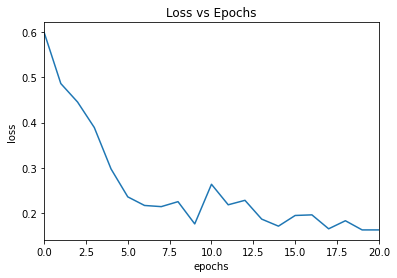

In [74]:
import matplotlib.pyplot as plt

#plot loss vs epochs
plt.plot(loss_list)
plt.title('Loss vs Epochs')
plt.ylabel('loss')
plt.xlim([0, 20])
plt.xlabel('epochs')
plt.show()

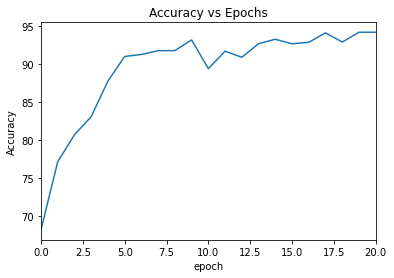

In [75]:
#plot accuracy vs epochs
plt.plot(acc_list)
plt.title('Accuracy vs Epochs')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 20])
plt.show()

In [81]:
def test(model, device, test_loader):
    """Test the model on the test data
    """
    model.eval() #set model to evaluation mode
    test_loss = 0
    correct = 0
    loss_list = []
    acc_list = []
    with torch.no_grad(): #no need to compute gradients
        for data, target in test_loader: #for each batch
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += nn.MSELoss()(output, target).item() # I put MSE because it didn't work with the optim 
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            test_loss /= len(test_loader.dataset)
            loss_list.append(test_loss)
            acc_list.append(100 * correct / len(test_loader.dataset))

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100 * correct / len(test_loader.dataset)))
    return loss_list, acc_list
test_loss, test_acc = test(model, device, testDataLoader)


Test set: Average loss: 0.0210, Accuracy: 633/633 (100%)



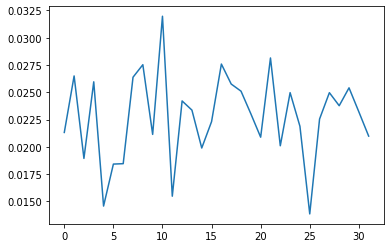

In [82]:
#plot test losses vs epochs
plt.plot(test_loss)
plt.show()

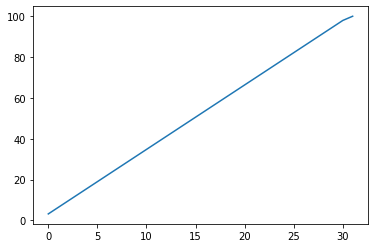

In [83]:
#plot test accuracies vs epochs
plt.plot(test_acc)
plt.show()